In [16]:
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy
import xarray as xr
from scipy.stats import gaussian_kde
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [5]:
work_dir=Path("/mnt/u/LSM root zone/global_sr")
work_dir2=Path('/mnt/c/Users/fransjevanoors/surfdrive - Fransje van Oorschot@surfdrive.surf.nl/Fransje/')

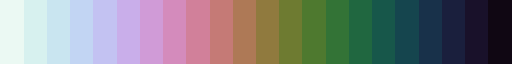

In [6]:
import matplotlib
cmap = cm.get_cmap('cubehelix_r', 24)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
cmap_sr = ListedColormap(color_list[1:-1])
cmap_sr.set_over(color_list[-1])
cmap_sr.set_under(color_list[0])
# cmap_sr.set_bad('whitesmoke')
cmap_sr

/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_lin

Text(0.5, 1.0, 'Soil types HTESSEL')

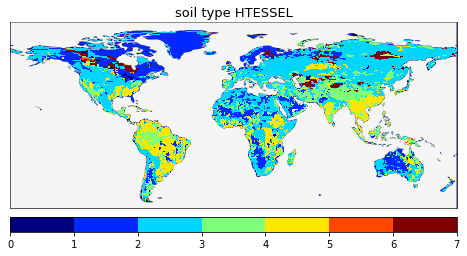

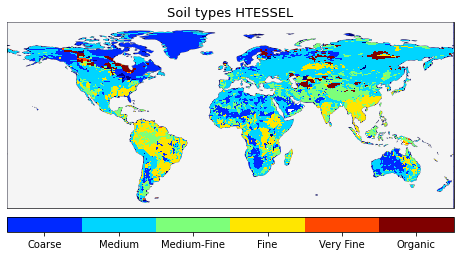

In [7]:
# htessel soil types
st = xr.open_dataset(f'{work_dir2}/HTESSEL/grib_conversion_soil_map/SLT_in.nc')
# st.SLT
st['lon'] = xr.where(st['lon'] > 180, st['lon'] - 360, st['lon'])
st = st.sortby('lon')

# plot map
bounds = np.linspace(0,7,8)
bounds2 = np.linspace(0,7,8)
norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a= st.SLT[0].plot(ax=ax,levels=bounds, add_colorbar=False,cmap='jet')
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='',size=10)
ax.set_title('soil type HTESSEL',size=13)

# plot map 2
bounds = np.linspace(1,7,7)
bounds2 = np.linspace(1,7,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a= st.SLT[0].plot(ax=ax,levels=bounds, add_colorbar=False,cmap='jet')
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02,aspect=30)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='',size=10)
cbar.set_ticks([1.5,2.5,3.5,4.5,5.5,6.5])
cbar.set_ticklabels(['Coarse','Medium','Medium-Fine','Fine','Very Fine','Organic'])
ax.set_title('Soil types HTESSEL',size=13)

534.65 566.44 725.39 491.3 598.23 1144.44 436.39


/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_lin

Text(0.5, 1.0, 'Sr based on soil type HTESSEL')

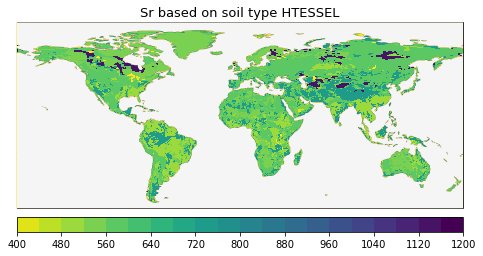

In [8]:
# convert soil types to Sr using depths and FC-WP
st = xr.open_dataset(f'{work_dir2}/HTESSEL/grib_conversion_soil_map/SLT_in.nc')
# st.SLT
st['lon'] = xr.where(st['lon'] > 180, st['lon'] - 360, st['lon'])
st = st.sortby('lon')

s1 = 0.185 * 2890
s2 = 0.196 * 2890
s3 = 0.251 * 2890
s4 = 0.170 * 2890
s5 = 0.207 * 2890
s6 = 0.396 * 2890
s7 = 0.151 * 2890
st['SLT'] = xr.where(st['SLT'] == 1, s1, st['SLT'])
st['SLT'] = xr.where(st['SLT'] == 2, s2, st['SLT'])
st['SLT'] = xr.where(st['SLT'] == 3, s3, st['SLT'])
st['SLT'] = xr.where(st['SLT'] == 4, s4, st['SLT'])
st['SLT'] = xr.where(st['SLT'] == 5, s5, st['SLT'])
st['SLT'] = xr.where(st['SLT'] == 6, s6, st['SLT'])
st['SLT'] = xr.where(st['SLT'] == 7, s7, st['SLT'])
print(s1,s2,s3,s4,s5,s6,s7)

# plot sr htessel based on soil type
bounds = np.linspace(400,1200,21)
bounds2 = np.linspace(400,1200,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a= st.SLT[0].plot(ax=ax,levels=bounds, add_colorbar=False,cmap='viridis_r')
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='neither', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='',size=10)
ax.set_title('Sr based on soil type HTESSEL',size=13)

In [9]:
# output from IAKV experiment
s = xr.open_dataset(f'/mnt/u/LSM root zone/o_soil_1999_2018_monthly.nc')
s['lon'] = xr.where(s['lon'] > 180, s['lon'] - 360, s['lon'])
s = s.sortby('lon')

# convert to mm for each layer
s1 = s.SWVL1 * 70
s2 = s.SWVL2 * 210
s3 = s.SWVL3 * 720
s4 = s.SWVL4 * 1890

# sum four layers sm
ss = s1+s2+s3+s4

In [10]:
# compute for each year max - min
ps = []
for i in range(20):
    y = ss[(12*(i)):(12*(i+1))]
    mx = y.max(dim='time')
    mn = y.min(dim='time')
    m = mx - mn
    ps.append(m)

# for all years: max (max-min)
pss = xr.concat(ps, dim='z')
pss = pss.max(dim='z')

/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/fvanoorschot/miniconda3/envs/sr_env/lib/python3.9/site-packages/cartopy/crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_lin

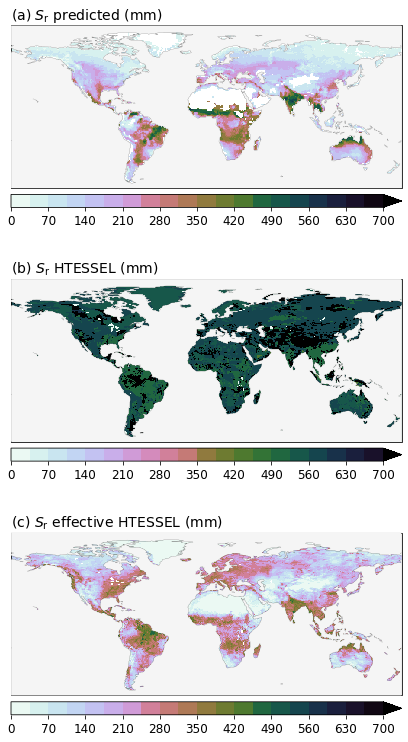

In [11]:
# plot sr
p = xr.open_dataset(f'{work_dir}/output/gridded_sr/sr_predicted_map_T255.nc')

bounds = np.linspace(0,700,21)
bounds2 = np.linspace(0,700,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

fig2 = plt.figure(figsize=(7,21))
ax = fig2.add_subplot(311,projection=ccrs.PlateCarree())
plt.subplots_adjust(hspace=-0.6)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = p.sr.plot(ax=ax, cmap=cmap_sr,levels=bounds, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.01,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='',size=12)
ax.set_title('')
ax.set_title('(a) $S_\mathrm{r}$ predicted (mm)',size=14,loc='left')

# HTESSEL based on soiltypes
# bounds = np.linspace(0,500,21)
# bounds2 = np.linspace(0,500,11)
# norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

ax = fig2.add_subplot(312,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a= st.SLT[0].plot(ax=ax,levels=bounds, add_colorbar=False,cmap=cmap_sr)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.01,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='',size=12)
ax.set_title('')
ax.set_title('(b) $S_\mathrm{r}$ HTESSEL (mm)',size=14,loc='left')

# HTESSEL based on soiltypes
# bounds = np.linspace(0,500,21)
# bounds2 = np.linspace(0,500,11)
# norm = mpl.colors.BoundaryNorm(bounds, cmap_sr.N)

ax = fig2.add_subplot(313,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a= pss.plot(ax=ax,levels=bounds, add_colorbar=False,cmap=cmap_sr)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.01,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='',size=12)
ax.set_title('')
ax.set_title('(c) $S_\mathrm{r}$ effective HTESSEL (mm)',size=14,loc='left')

fig2.savefig(f'{work_dir2}/phd_thesis/sr_comparison_conclusions.jpg',bbox_inches='tight',dpi=600)


In [12]:
from scipy.stats import spearmanr
def correlations(x,y):
    x1 = x.stack(flat=['lat','lon']).values
    y1 = y.stack(flat=['lat','lon']).values
    nan_indices = np.logical_or(np.isnan(x1), np.isnan(y1))
    x1[nan_indices] = np.nan
    y1[nan_indices] = np.nan
    x2 = x1[~np.isnan(x1)]
    y2 = y1[~np.isnan(y1)]
    # print(len(x2),len(y2))
    rp = np.round(np.corrcoef(x2,y2)[0,1],2)
    rs = np.round(spearmanr(x2,y2)[0],2)
    return(len(x2),len(y2),rp,rs)

In [13]:
x,y = p.sr,pss
correlations(x,y)

(12627, 12627, 0.2, 0.13)

In [14]:
x,y =  p.sr,st.SLT[0]
correlations(x,y)

(12627, 12627, 0.05, 0.12)

12627
12627


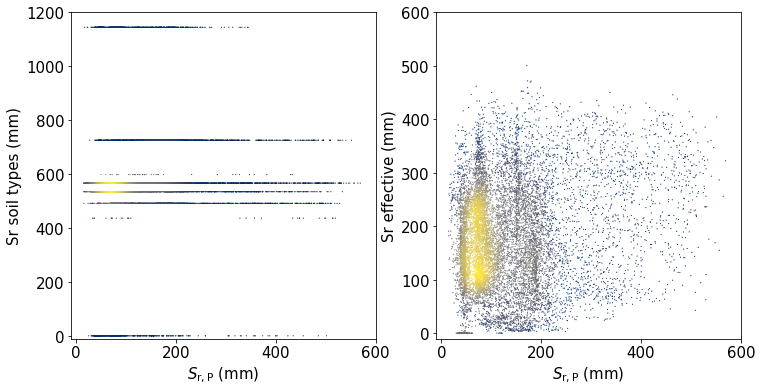

In [21]:
# PLOT
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
x,y = p.sr,st.SLT[0]
x = x.stack(flat=['lat','lon']).values
y = y.stack(flat=['lat','lon']).values
nan_indices = np.logical_or(np.isnan(x), np.isnan(y))
x[nan_indices] = np.nan
y[nan_indices] = np.nan
x = x[~np.isnan(x)]
y = y[~np.isnan(y)]
kde = gaussian_kde(np.vstack([x, y]))
z = kde(np.vstack([x, y]))
ax.scatter(x,y,c=z,s=1,cmap='cividis',linewidth=0.1,edgecolors='face',marker='o')
ax.set_xlim(-10,600)
ax.set_ylim(-10,1200)
ax.tick_params(axis='both',labelsize=15)
ax.set_xlabel('$S_\mathrm{r,P}$ (mm)',size=15)
ax.set_ylabel('Sr soil types (mm)',size=15)
print(len(x))

ax = fig.add_subplot(122)
x,y =  p.sr,pss
x = x.stack(flat=['lat','lon']).values
y = y.stack(flat=['lat','lon']).values
nan_indices = np.logical_or(np.isnan(x), np.isnan(y))
x[nan_indices] = np.nan
y[nan_indices] = np.nan
x = x[~np.isnan(x)]
y = y[~np.isnan(y)]
kde = gaussian_kde(np.vstack([x, y]))
z = kde(np.vstack([x, y]))
ax.scatter(x,y,c=z,s=1,cmap='cividis',linewidth=0.1,edgecolors='face',marker='o')
ax.set_xlim(-10,600)
ax.set_ylim(-10,600)
ax.tick_params(axis='both',labelsize=15)
ax.set_xlabel('$S_\mathrm{r,P}$ (mm)',size=15)
ax.set_ylabel('Sr effective (mm)',size=15)
print(len(x))
